In [1]:
import pandas as pd


In [43]:
adj_bmp='/Users/alichemkhi/Desktop/myProjects/2D_gast/output/v0.2/adjacencyMatrix.miic.orientProba.bmp.txt'
adj_wnt='/Users/alichemkhi/Desktop/myProjects/2D_gast/output/v0.2/adjacencyMatrix.miic.orientProba.wnt.txt'

adj_bmp_df = pd.read_csv(adj_bmp, sep="\t",index_col=0,header=0) 
adj_wnt_df = pd.read_csv(adj_wnt, sep="\t",index_col=0,header=0)


In [44]:
adj_bmp_df.head()

,AXIN2,BMP4,CDX2,CITED1,EOMES,ETV2,FOXA1,FOXA2,FOXC1,FOXC2,...,MED9,BUD31,PMF1,MTDH,PRMT5,time,celltype,mtMean,rplMean,rpsMean
AXIN2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BMP4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CDX2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
CITED1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EOMES,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
adj_wnt_df.head()

,AXIN2,BMP4,CDX2,CITED1,EOMES,ETV2,FOXA1,FOXA2,FOXC1,FOXC2,...,WDR77,MED9,BRD4,LDB1,MED4,time,celltype,mtMean,rplMean,rpsMean
AXIN2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BMP4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CDX2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CITED1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EOMES,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# intersecting the two dataframes
# NOTE : because adj is a symmetric matrix, we can use the columns or the index to get the intersection
node_intersection = adj_bmp_df.columns.intersection(adj_wnt_df.columns) 
# keeping only the columns that are in both dataframes
adj_bmp_df_common = adj_bmp_df[node_intersection]
# keeping the rows that are in both dataframes
adj_bmp_df_common = adj_bmp_df_common[ adj_bmp_df_common.index.isin(node_intersection)]

# keeping only the columns that are in both dataframes
adj_wnt_df_common = adj_wnt_df[node_intersection]
# keeping the rows that are in both dataframes
adj_wnt_df_common = adj_wnt_df_common[ adj_wnt_df_common.index.isin(node_intersection)]


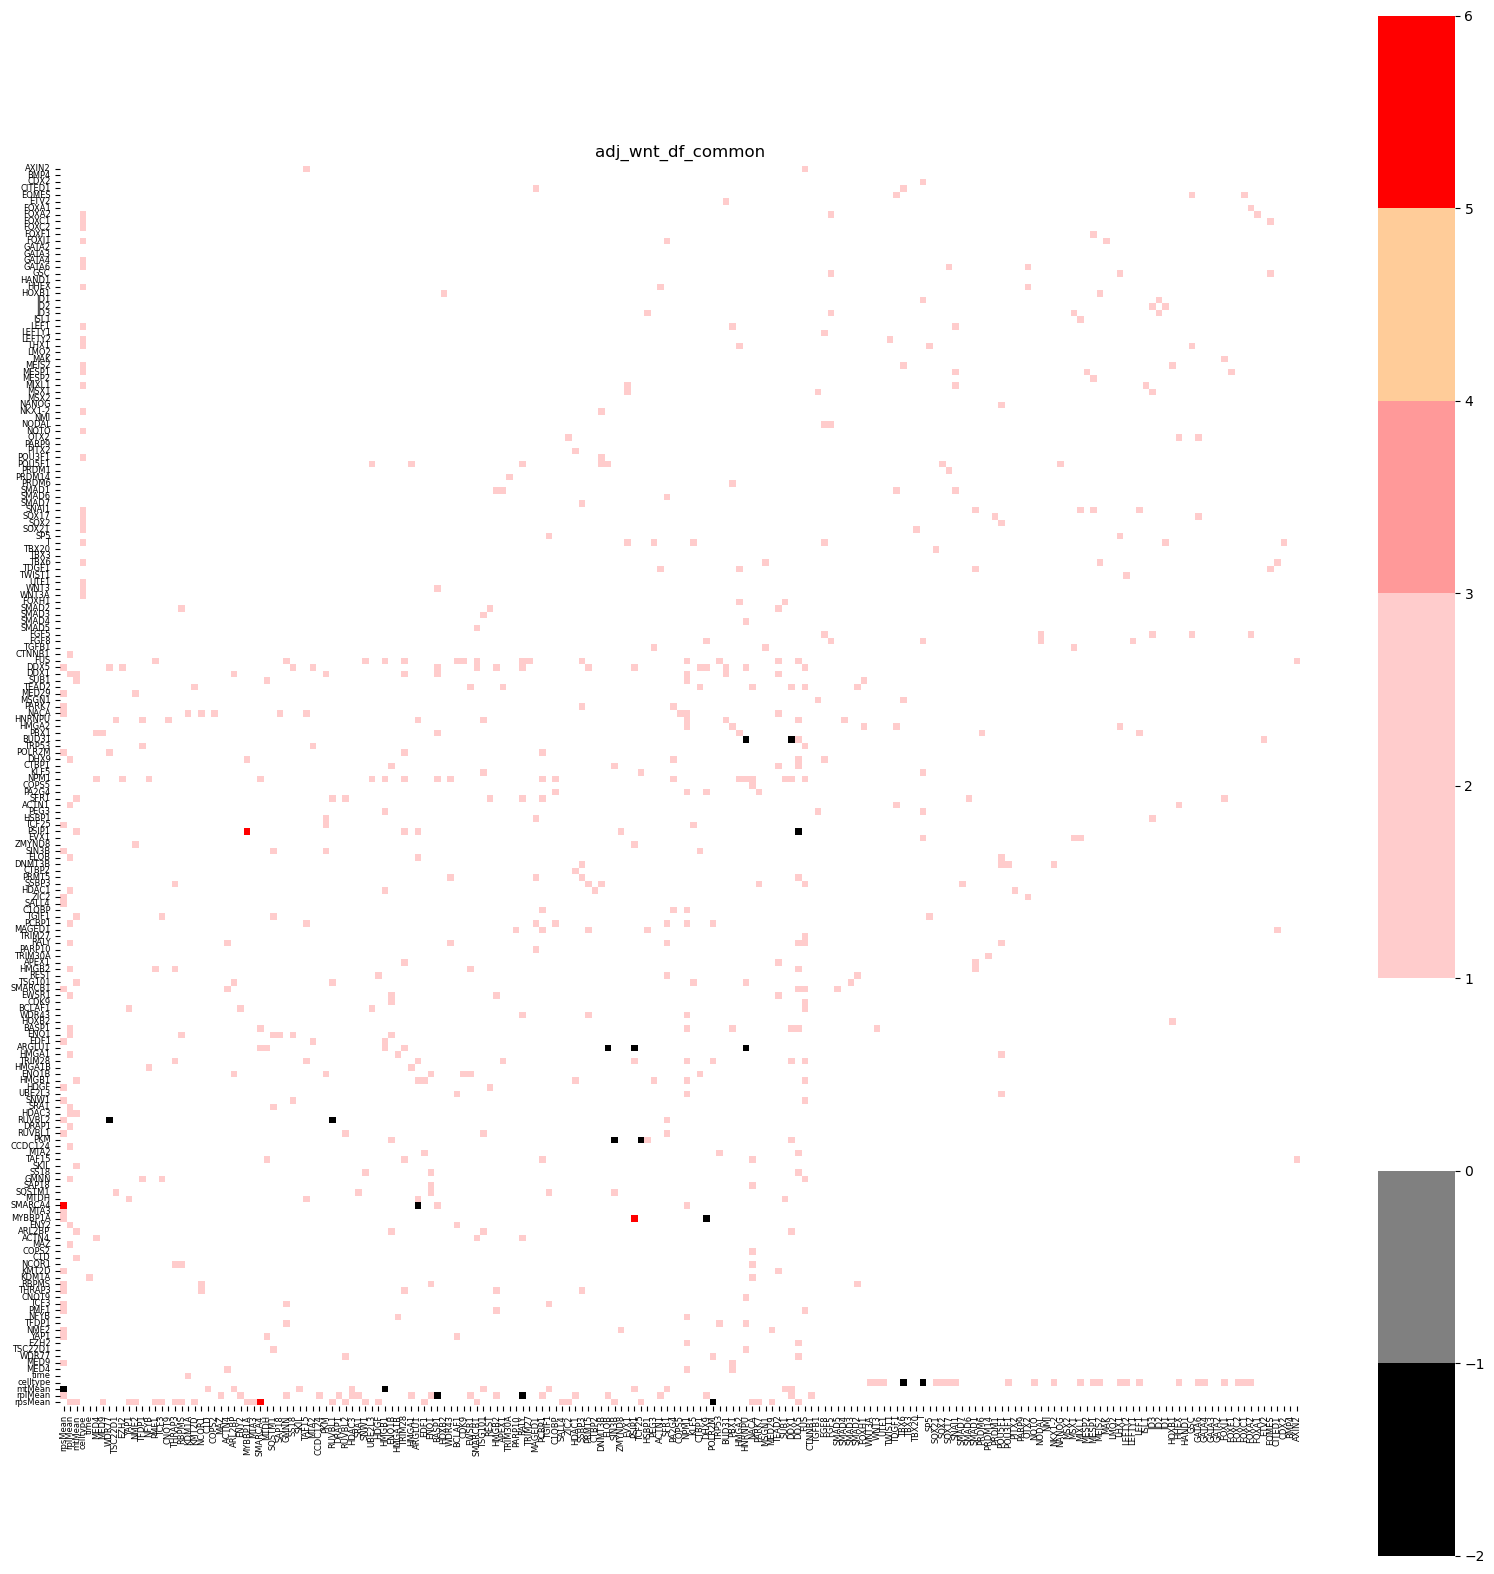

In [104]:
# a heatmap of the intersection
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize=(20, 20))
y_axis_order = adj_wnt_df_common.index[::-1]
adj_wnt_df_common_ordered = adj_wnt_df_common.loc[:,y_axis_order]
white="white"
orange="#ffcc99"
light_pink="#ffcccc"
light_red="#ff9999"
red="#ff0000"
pink="#ffcccc"
grey="#808080"
black="#000000"
colors=ListedColormap([black,grey,white,light_pink,pink,light_red,orange,red])

sns.heatmap(adj_wnt_df_common_ordered,cbar=True,cmap=colors,square=True, xticklabels=True, yticklabels=True)
plt.xticks(fontsize=6, rotation=90)
plt.yticks(fontsize=6)

plt.title("adj_wnt_df_common")
plt.show()


In [64]:
edge_intersection_array =(adj_wnt_df_common.values==adj_bmp_df_common.values)
edge_intersection_array

# creating a dataframe from the array
edge_intersection_df = pd.DataFrame(edge_intersection_array, columns=adj_wnt_df_common.columns, index=adj_wnt_df_common.columns)
edge_intersection_df.head()




,AXIN2,BMP4,CDX2,CITED1,EOMES,ETV2,FOXA1,FOXA2,FOXC1,FOXC2,...,MED9,BUD31,PMF1,MTDH,PRMT5,time,celltype,mtMean,rplMean,rpsMean
AXIN2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
BMP4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
CDX2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True
CITED1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
EOMES,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True


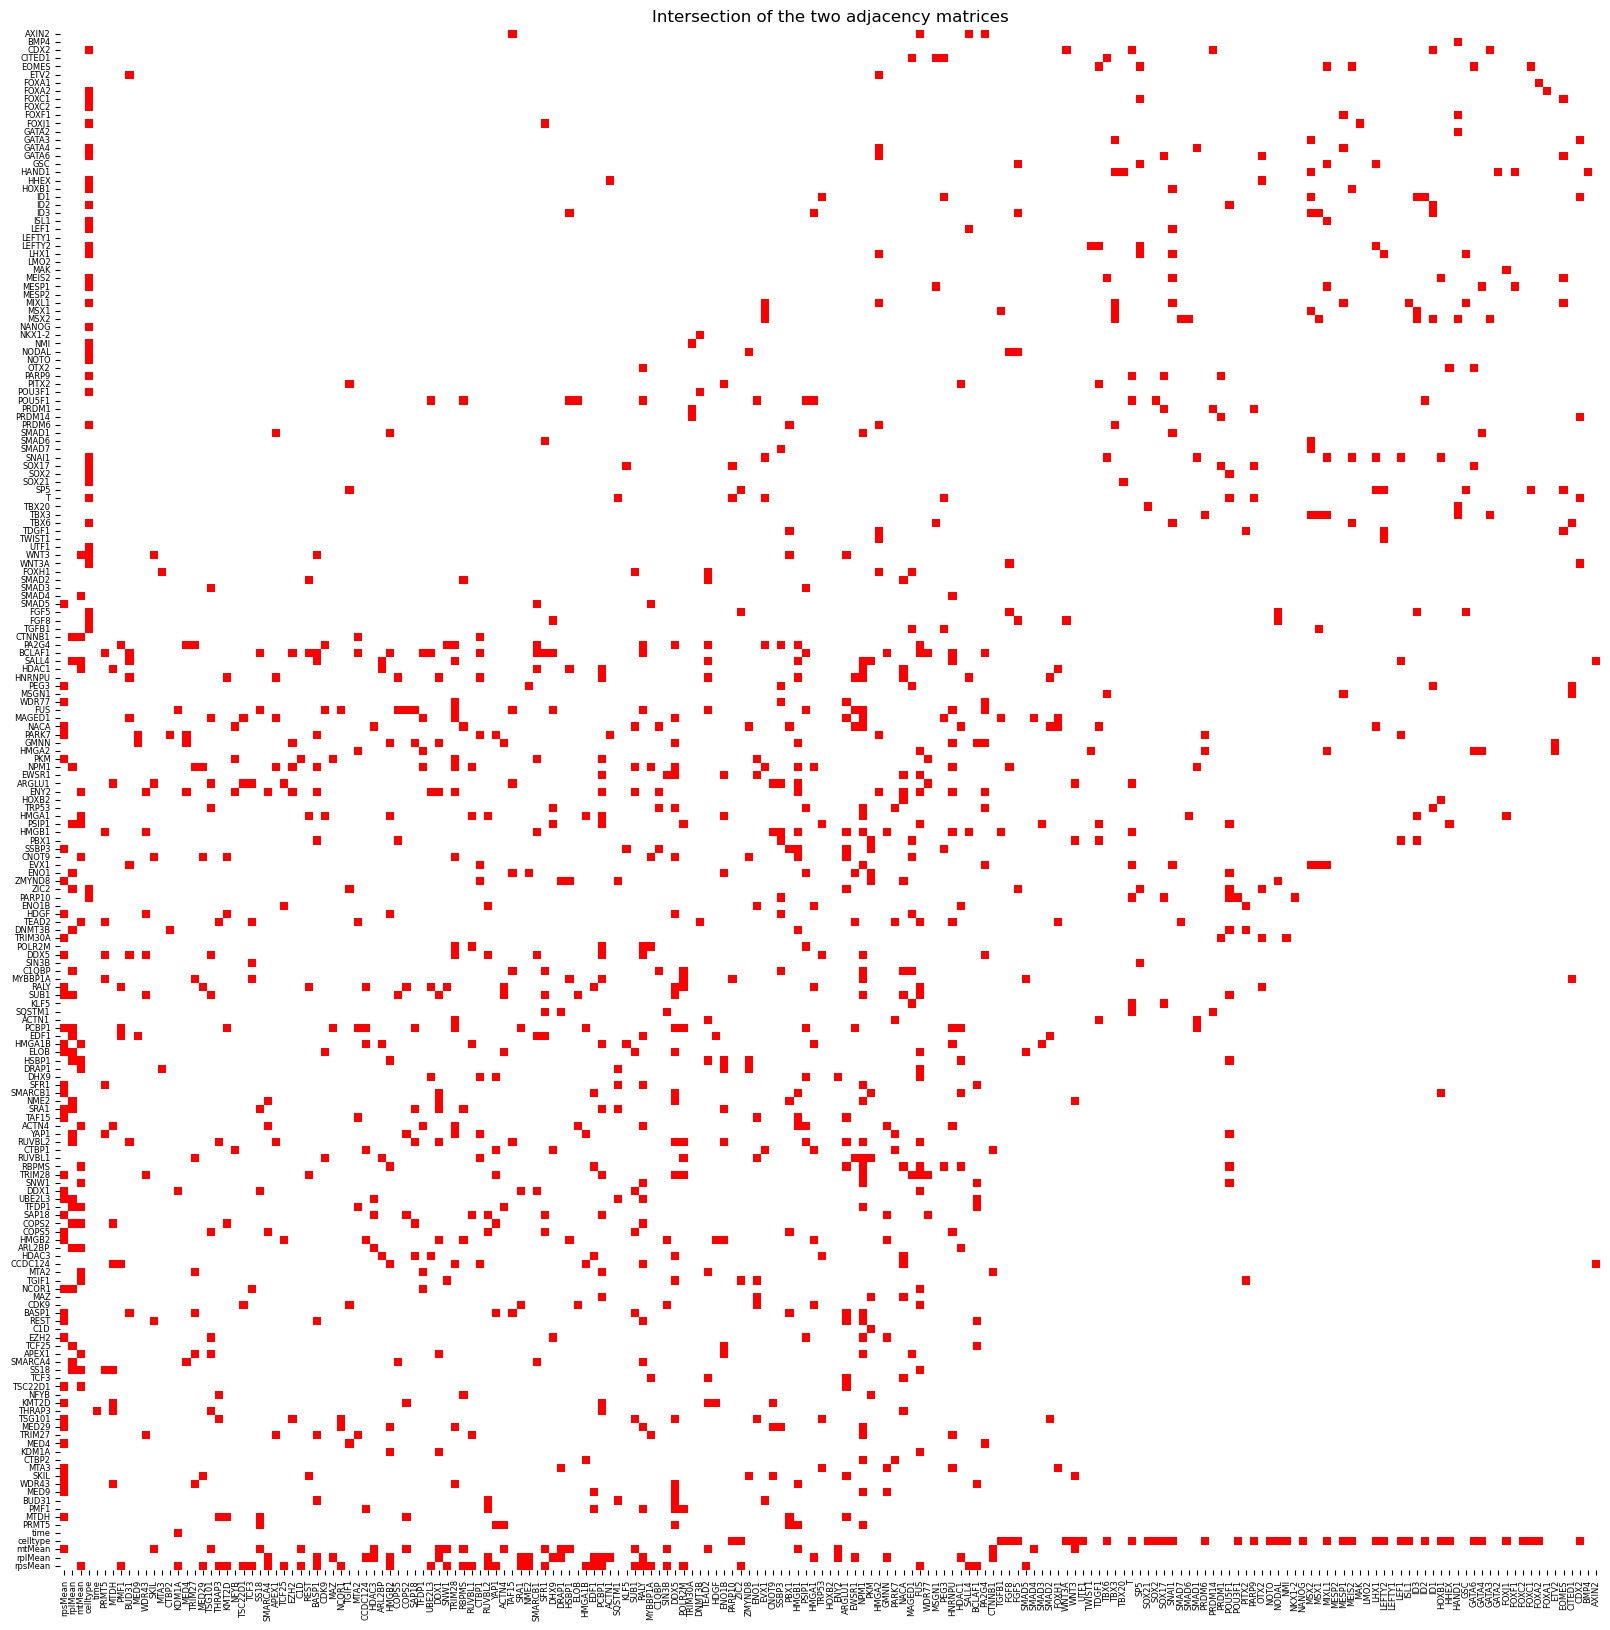

In [91]:
# a heatmap of the intersection
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize=(20, 20))
y_axis_order = edge_intersection_df.index[::-1]
edge_intersection_df_ordered = edge_intersection_df.loc[:,y_axis_order]
binary_cmap = ListedColormap([ "#FF0000","#FFFFFF"]) # red and white
sns.heatmap(edge_intersection_df_ordered, cmap=binary_cmap, cbar=False,square=True, xticklabels=True, yticklabels=True)
plt.xticks(fontsize=6, rotation=90)
plt.yticks(fontsize=6)

plt.title("Intersection of the two adjacency matrices")
plt.savefig('/Users/alichemkhi/Desktop/myProjects/2D_gast/output/v0.2/adjacencyMatrix.miic.orientProba.intersection.png', dpi=300)
plt.show()


/Users/alichemkhi/miniconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/alichemkhi/miniconda3/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


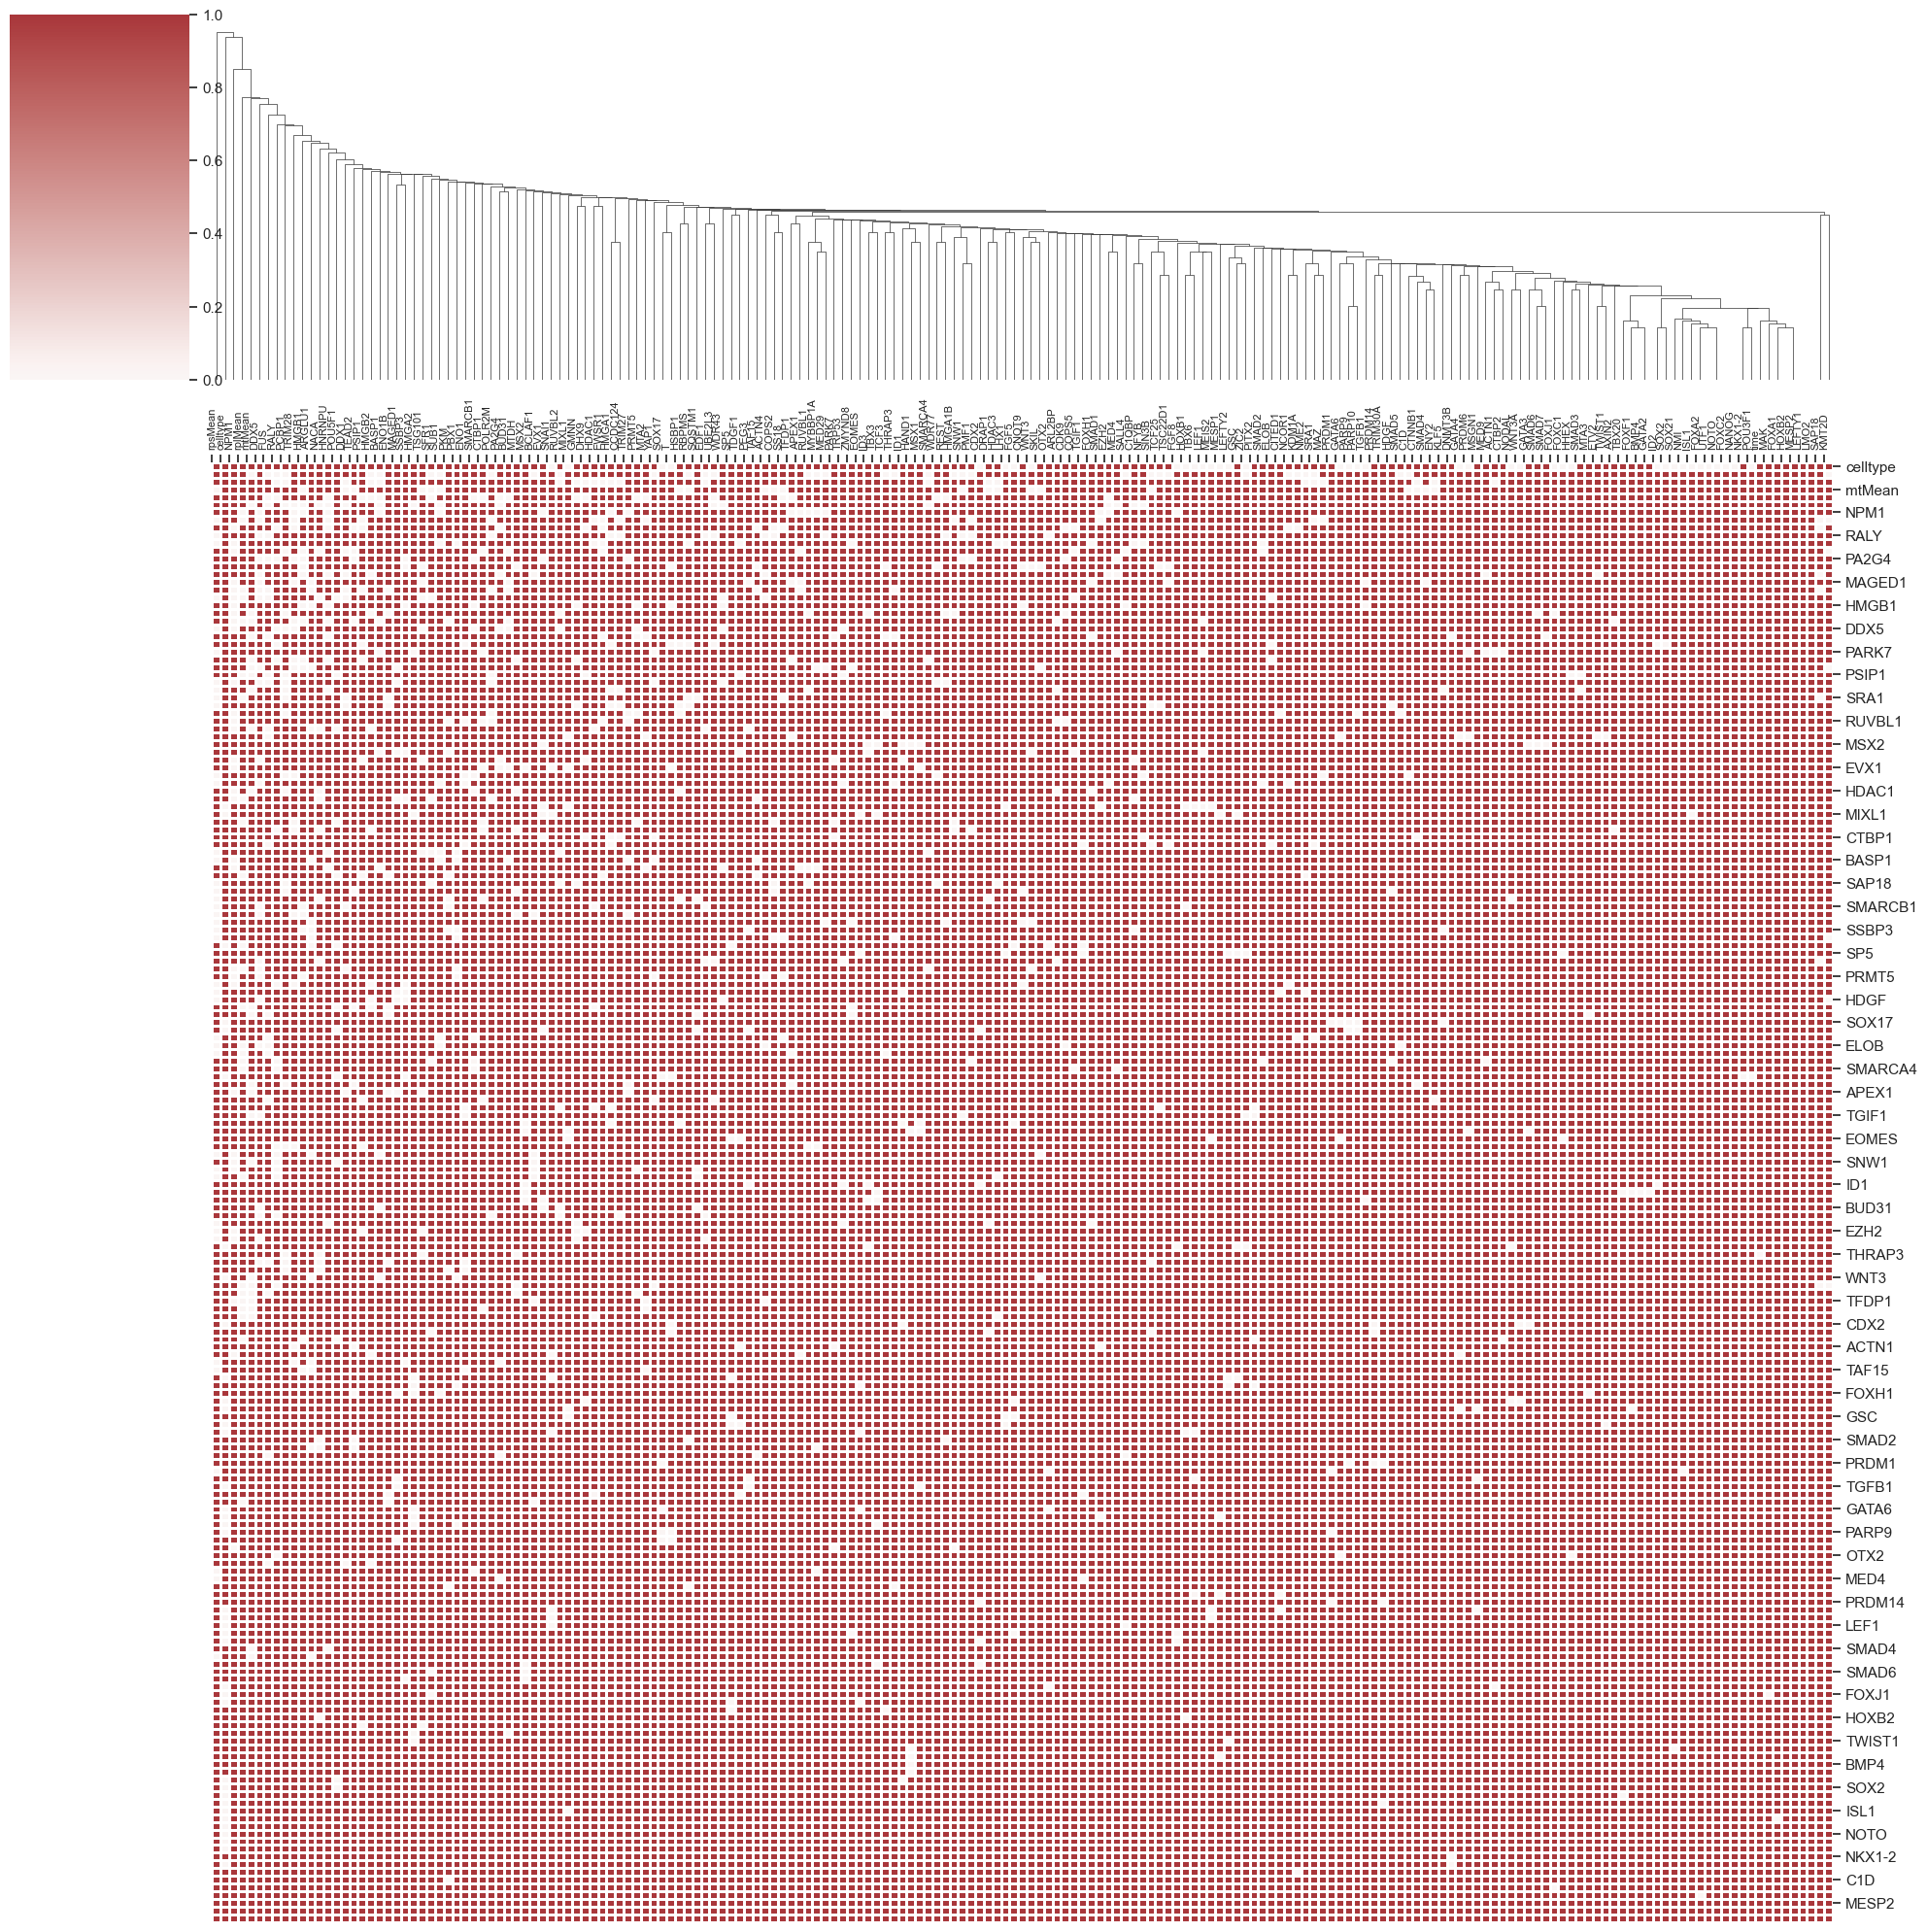

In [168]:
import numpy as np

g = sns.clustermap(edge_intersection_df, center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   linewidths=.75,
                   figsize=(20, 20))

# Move x-axis labels to the top
g.ax_heatmap.xaxis.set_ticks_position("top")
g.ax_heatmap.xaxis.set_label_position("top")

# Get all column names from the data (regardless of what gets shown in the plot)
column_names = g.data2d.columns

# Set xtick labels manually to ensure all labels are shown
g.ax_heatmap.set_xticks(np.arange(len(column_names)))  # Ensure every column is listed
g.ax_heatmap.set_xticklabels(column_names, rotation=90, fontsize=8)


g.ax_row_dendrogram.remove()

# Optional: Adjust layout for proper spacing
plt.tight_layout()
plt.show()


In [167]:
edge_intersection_df

,AXIN2,BMP4,CDX2,CITED1,EOMES,ETV2,FOXA1,FOXA2,FOXC1,FOXC2,...,MED9,BUD31,PMF1,MTDH,PRMT5,time,celltype,mtMean,rplMean,rpsMean
AXIN2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
BMP4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
CDX2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,True
CITED1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
EOMES,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
time,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
celltype,True,True,False,True,True,True,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
mtMean,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
rplMean,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
